# Setup

In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.join('../..'))) # access sibling directories

from src.python.metrics import performance_metrics, bootstrapped_metrics
from src.python.helpers import log_with_inf_noise_addition, computation_times
from src.python.visualization import plot_approximations

import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from sklearn.metrics import roc_auc_score

# Load data

In [2]:
comparison_folder = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'data', '02_bridge_sampling_comparison')
bridge_file = '2022_05_03_BF_BS'
NN_fixed_file = '2022_04_27_BF_NN_fixed'
NN_variable_file = '2022_04_29_BF_NN_variable'

bridge = pd.read_csv(os.path.join(comparison_folder, bridge_file), sep = " ").reset_index(drop=True)
NN_fixed = pd.read_csv(os.path.join(comparison_folder, NN_fixed_file))
NN_variable = pd.read_csv(os.path.join(comparison_folder, NN_variable_file))

# Calculate performance metrics

In [10]:
n_bootstrap = 100000
names = ['Bridge sampling', 'Fixed network', 'Variable network']
metrics = ['Accuracy', 'ROC AUC', 'MAE', 'RMSE', 'Log score', 'Bias']

# Calculate performance metrics
perf_metrics = performance_metrics(bridge, NN_fixed, NN_variable, names=names, metrics=metrics)

# Calculate bootstrapped performance metrics
metrics_means, metrics_sds = bootstrapped_metrics(bridge, NN_fixed, NN_variable, 100, names=names, metrics=metrics)

In [11]:
perf_metrics

,Accuracy,ROC AUC,MAE,RMSE,Log score,Bias
Bridge sampling,0.86,0.9196,0.187942,0.323034,0.320302,0.017537
Fixed network,0.85,0.9112,0.199099,0.335717,0.341402,0.024554
Variable network,0.85,0.9124,0.203283,0.334781,0.343539,0.031657


In [12]:
metrics_means

,Accuracy,ROC AUC,MAE,RMSE,Log score,Bias
Bridge sampling,0.8558,0.919673,0.190173,0.323432,0.324269,0.035866
Fixed network,0.8481,0.910639,0.200796,0.335353,0.344208,0.036694
Variable network,0.8445,0.912374,0.205515,0.335654,0.348610,0.039276


In [13]:
metrics_sds

,Accuracy,ROC AUC,MAE,RMSE,Log score,Bias
Bridge sampling,0.041453,0.032296,0.030050,0.038873,0.066516,0.028667
Fixed network,0.038979,0.033652,0.029933,0.037485,0.066337,0.031525
Variable network,0.041937,0.034282,0.030726,0.039457,0.068481,0.033935


In [46]:
# Convert to latex table

bootstr_metrics = metrics_means.copy()
metrics_means = metrics_means.round(2)
metrics_sds = metrics_sds.round(2)

for row in range(bootstr_metrics.shape[0]):
    for col in range(bootstr_metrics.shape[1]):
        bootstr_metrics.iloc[row,col] = f'{metrics_means.iloc[row,col]}' + f' ({metrics_sds.iloc[row,col]})'

print(bootstr_metrics.to_latex())

\begin{tabular}{lllllll}
\toprule
{} &     Accuracy &      ROC AUC &          MAE &         RMSE &    Log score &         Bias \\
\midrule
Bridge sampling  &  0.86 (0.04) &  0.92 (0.03) &  0.19 (0.03) &  0.32 (0.04) &  0.32 (0.07) &  0.04 (0.03) \\
Fixed network    &  0.85 (0.04) &  0.91 (0.03) &   0.2 (0.03) &  0.34 (0.04) &  0.34 (0.07) &  0.04 (0.03) \\
Variable network &  0.84 (0.04) &  0.91 (0.03) &  0.21 (0.03) &  0.34 (0.04) &  0.35 (0.07) &  0.04 (0.03) \\
\bottomrule
\end{tabular}



In [8]:
# How do the proportions of selected models look like?

print('True proportion = {}'.format(bridge['true_model'].mean()))
print('Bridge Sampling proportion = {}'.format(bridge['selected_model'].mean()))
print('NN fixed proportion = {}'.format(NN_fixed['selected_model'].mean()))
print('NN variable proportion = {}'.format(NN_variable['selected_model'].mean()))

True proportion = 0.5
Bridge Sampling proportion = 0.46
NN fixed proportion = 0.43
NN variable proportion = 0.47


# Plot PMPs & log BFs

In [9]:
# Compute Log BFs

log_bridge_bfs = log_with_inf_noise_addition(bridge)
log_NN_fixed_bfs = log_with_inf_noise_addition(NN_fixed)
log_NN_variable_bfs = log_with_inf_noise_addition(NN_variable)

## BS vs fixed NN

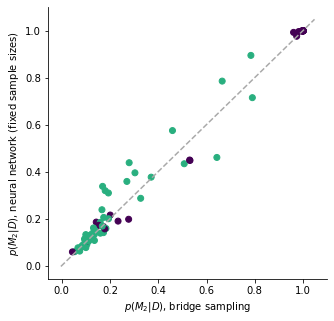

In [11]:
# PMPs
plot_approximations(bridge, NN_fixed, approximated_outcome=0, NN_name='neural network (fixed sample sizes)', save=True)

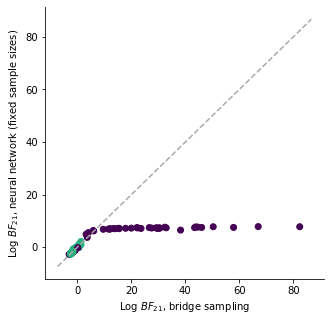

In [20]:
# Log BFs
plot_approximations(bridge, NN_fixed, approximated_outcome=1, NN_name='neural network (fixed sample sizes)')

# of included datasets: 66


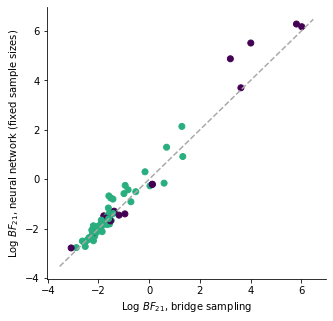

In [16]:
# Log Bfs with filter
filter = bridge['bayes_factor']<10000
bridge_filtered = bridge[filter].reset_index(drop=True)
NN_fixed_filtered = NN_fixed[filter].reset_index(drop=True)
print('# of included datasets: {}'.format(sum(filter)))

plot_approximations(bridge_filtered, NN_fixed_filtered, approximated_outcome=1, NN_name='neural network (fixed sample sizes)', save=True)

## BS vs variable NN

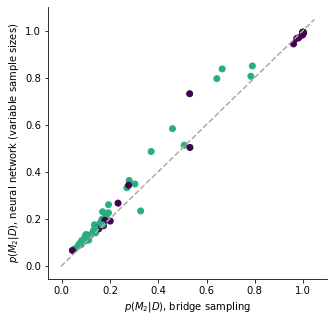

In [17]:
# PMPs
plot_approximations(bridge, NN_variable, approximated_outcome=0, NN_name='neural network (variable sample sizes)', save=True)

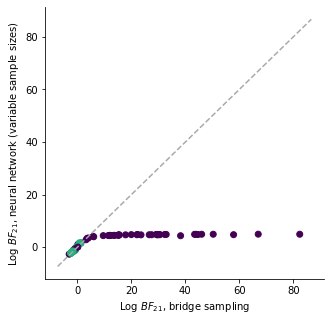

In [18]:
# Log BFs
plot_approximations(bridge, NN_variable, approximated_outcome=1, NN_name='neural network (variable sample sizes)')

# of included datasets: 66


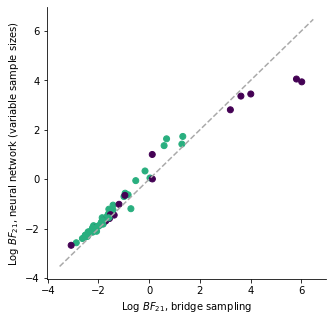

In [19]:
# Log Bfs with filter
filter = bridge['bayes_factor']<10000
bridge_filtered = bridge[filter].reset_index(drop=True)
NN_variable_filtered = NN_variable[filter].reset_index(drop=True)
print('# of included datasets: {}'.format(sum(filter)))

plot_approximations(bridge_filtered, NN_variable_filtered, approximated_outcome=1, NN_name='neural network (variable sample sizes)', save=True)

# Plot computation time as function of datasets

In [20]:
# Calculate computation times
bridge_time, NN_fixed_time, NN_variable_time = computation_times(bridge, NN_fixed, NN_variable)

In [21]:
# Mean computation times per phase
# Bridge Sampling
print('Stan: {}'.format(np.mean(bridge['stan_time'])))
print('Bridge: {}'.format(np.mean(bridge['bridge_time'])))

# NN fixed
print('NN fixed training: {}'.format(np.mean(NN_fixed['training_time'])))
print('NN fixed inference: {}'.format(np.mean(NN_fixed['inference_time'])))

# NN variable
print('NN variable training: {}'.format(np.mean(NN_variable['training_time'])))
print('NN variable inference: {}'.format(np.mean(NN_variable['inference_time'])))

Stan: 42.850982012748716
Bridge: 29.34168642282486
NN fixed training: 722.9514567999998
NN fixed inference: 0.0006955440000001003
NN variable training: 2810.423959399999
NN variable inference: 0.0034660489999987004


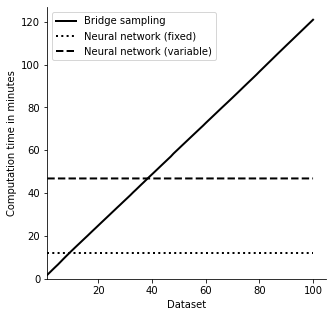

In [23]:
# Plot for all datasets
f, ax = plt.subplots(1, 1, figsize=figsize)
ax.plot(bridge_time, label='Bridge sampling', lw=2, color='black')
ax.plot(NN_fixed_time, label='Neural network (fixed)', lw=2, linestyle='dotted', color='black')
ax.plot(NN_variable_time, label='Neural network (variable)', lw=2, linestyle='dashed', color='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Dataset') # add (cumulative)? 
ax.set_ylabel('Computation time in minutes')
ax.set_xlim(xmin=1)
ax.set_ylim(ymin=0)
ax.legend(loc='upper left')
#f.savefig('comp_times_BF_comparison.png', dpi=300, bbox_inches='tight')

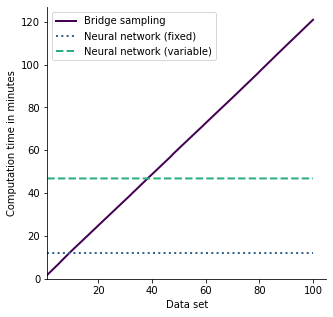

In [29]:
# Plot for all datasets
f, ax = plt.subplots(1, 1, figsize=figsize)
ax.plot(bridge_time, label='Bridge sampling', lw=2, color='#440154FF')
ax.plot(NN_fixed_time, label='Neural network (fixed)', lw=2, linestyle='dotted', color='#33638DFF')
ax.plot(NN_variable_time, label='Neural network (variable)', lw=2, linestyle='dashed', color='#29AF7FFF')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Data set') # add (cumulative)? 
ax.set_ylabel('Computation time in minutes')
ax.set_xlim(xmin=1)
ax.set_ylim(ymin=0)
ax.legend(loc='upper left')
f.savefig('BF_comparison_comp_times.png', dpi=300, bbox_inches='tight')

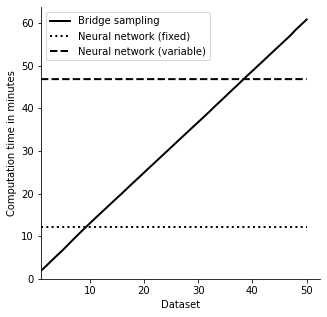

In [30]:
# Compute & plot for first d datasets
d=50
bridge_time_short, NN_fixed_time_short, NN_variable_time_short = computation_times(bridge.iloc[:d,:], NN_fixed.iloc[:d,:], NN_variable.iloc[:d,:])

f, ax = plt.subplots(1, 1, figsize=figsize)
ax.plot(bridge_time_short, label='Bridge sampling', lw=2, color='black')
ax.plot(NN_fixed_time_short, label='Neural network (fixed)', lw=2, linestyle='dotted', color='black')
ax.plot(NN_variable_time_short, label='Neural network (variable)', lw=2, linestyle='dashed', color='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Dataset')
ax.set_ylabel('Computation time in minutes')
#ax.set_xticks(bridge_time_short.index) # display ticks for each dataset
ax.set_xlim(xmin=1)
ax.set_ylim(ymin=0)
ax.legend()
#f.savefig('figures/BF_N_Toy.png', dpi=300, bbox_inches='tight')